In [73]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [74]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [75]:
# Add the latitudes and longitiudes to a list. 
coordinates = list(lat_lngs)

In [76]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [77]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [78]:
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [79]:
# Create a list for holding rhe cities..
cities = []
# Identify the nearest vity for each latitiude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name
    
    #If the city is unique, then we will ad it to the cities list. 
    if city not in cities:
        cities.append(city)
# print the city count to confirm suffiecient count. 
len(cities)

603

In [107]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [108]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
    except:
        print("City not found. Skipping...")
        pass

    # Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | anadyr
Processing Record 2 of Set 1 | georgetown
Processing Record 3 of Set 1 | tuktoyaktuk
Processing Record 4 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 5 of Set 1 | fortuna
Processing Record 6 of Set 1 | catuday
Processing Record 7 of Set 1 | puerto escondido
Processing Record 8 of Set 1 | atuona
Processing Record 9 of Set 1 | busselton
Processing Record 10 of Set 1 | dikson
Processing Record 11 of Set 1 | mataura
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | vilhena
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | qaqortoq
Processing Record 16 of Set 1 | salalah
Processing Record 17 of Set 1 | kudahuvadhoo
Processing Record 18 of Set 1 | ancud
Processing Record 19 of Set 1 | naze
Processing Record 20 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 21 of Set 1 | hermanus
Processing Re

Processing Record 37 of Set 4 | hualmay
Processing Record 38 of Set 4 | walvis bay
Processing Record 39 of Set 4 | caravelas
Processing Record 40 of Set 4 | nanakuli
Processing Record 41 of Set 4 | nizhneivkino
Processing Record 42 of Set 4 | qandala
Processing Record 43 of Set 4 | havelock
Processing Record 44 of Set 4 | fort nelson
Processing Record 45 of Set 4 | barentsburg
City not found. Skipping...
Processing Record 46 of Set 4 | kruisfontein
Processing Record 47 of Set 4 | nanortalik
Processing Record 48 of Set 4 | lebu
Processing Record 49 of Set 4 | flinders
Processing Record 50 of Set 4 | itainopolis
Processing Record 1 of Set 5 | calama
Processing Record 2 of Set 5 | acapulco
Processing Record 3 of Set 5 | qasigiannguit
Processing Record 4 of Set 5 | byron bay
Processing Record 5 of Set 5 | karkaralinsk
City not found. Skipping...
Processing Record 6 of Set 5 | christchurch
Processing Record 7 of Set 5 | san cristobal
Processing Record 8 of Set 5 | colombo
Processing Record 

Processing Record 27 of Set 8 | lolua
City not found. Skipping...
Processing Record 28 of Set 8 | taoudenni
Processing Record 29 of Set 8 | svoge
Processing Record 30 of Set 8 | san pedro
Processing Record 31 of Set 8 | hervey bay
Processing Record 32 of Set 8 | basco
Processing Record 33 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 34 of Set 8 | maragogi
Processing Record 35 of Set 8 | codrington
Processing Record 36 of Set 8 | uribia
Processing Record 37 of Set 8 | tonj
Processing Record 38 of Set 8 | aklavik
Processing Record 39 of Set 8 | uyar
Processing Record 40 of Set 8 | gat
Processing Record 41 of Set 8 | bredasdorp
Processing Record 42 of Set 8 | barreirinhas
Processing Record 43 of Set 8 | nanton
Processing Record 44 of Set 8 | darnah
Processing Record 45 of Set 8 | kawalu
Processing Record 46 of Set 8 | tayu
Processing Record 47 of Set 8 | sawakin
Processing Record 48 of Set 8 | plettenberg bay
Processing Record 49 of Set 8 | bosaso
Processing Record 50

Processing Record 16 of Set 12 | celica
Processing Record 17 of Set 12 | lasa
Processing Record 18 of Set 12 | cantagallo
Processing Record 19 of Set 12 | mount gambier
Processing Record 20 of Set 12 | shiraz
Processing Record 21 of Set 12 | varhaug
Processing Record 22 of Set 12 | poya
Processing Record 23 of Set 12 | ploemeur
Processing Record 24 of Set 12 | dombasle-sur-meurthe
Processing Record 25 of Set 12 | sibu
Processing Record 26 of Set 12 | malinovskiy
Processing Record 27 of Set 12 | karla
Processing Record 28 of Set 12 | jaque
Processing Record 29 of Set 12 | tuy hoa
Processing Record 30 of Set 12 | temaraia
City not found. Skipping...
Processing Record 31 of Set 12 | saint-joseph
Processing Record 32 of Set 12 | awbari
Processing Record 33 of Set 12 | karacakoy
Processing Record 34 of Set 12 | port said
Processing Record 35 of Set 12 | tuggurt
City not found. Skipping...
Processing Record 36 of Set 12 | nyurba
Processing Record 37 of Set 12 | calafell
Processing Record 38 

In [109]:
# # Loop through all the cities in our list.
# for i in range(len(cities)):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + cities[i]

In [110]:
# # Loop through all the cities in the list.
# for i, city in enumerate(cities):

#     # Group cities in sets of 50 for logging purposes.
#     if (i % 50 == 0 and i >= 50):
#         set_count += 1
#         record_count = 1
#     # Create endpoint URL with each city.
#     city_url = url + "&q=" + city.replace(" ","+")

#     # Log the URL, record, and set numbers and the city.
#     print(f"Processing Record {record_count} of Set {set_count} | {city}")
#     # Add 1 to the record count.
#     record_count += 1
#     try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})
#     except:
#         print("City not found. Skipping...")
#         pass

#     # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [111]:
#     try:
#         # Parse the JSON and retrieve data.
#         city_weather = requests.get(city_url).json()
#         # Parse out the needed data.
#         city_lat = city_weather["coord"]["lat"]
#         city_lng = city_weather["coord"]["lon"]
#         city_max_temp = city_weather["main"]["temp_max"]
#         city_humidity = city_weather["main"]["humidity"]
#         city_clouds = city_weather["clouds"]["all"]
#         city_wind = city_weather["wind"]["speed"]
#         city_country = city_weather["sys"]["country"]
#         # Convert the date to ISO standard.
#         city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
#         # Append the city information into city_data list.
#         city_data.append({"City": city.title(),
#                           "Lat": city_lat,
#                           "Lng": city_lng,
#                           "Max Temp": city_max_temp,
#                           "Humidity": city_humidity,
#                           "Cloudiness": city_clouds,
#                           "Wind Speed": city_wind,
#                           "Country": city_country,
#                           "Date": city_date})
#     except:
#         print("City not found. Skipping...")
#         pass

#     # Indicate that Data Loading is complete.
# print("-----------------------------")
# print("Data Retrieval Complete      ")
# print("-----------------------------")

In [113]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Anadyr,64.7500,177.4833,8.60,78,75,17.90,RU,2021-04-01 11:01:29
1,Georgetown,5.4112,100.3354,89.60,66,20,8.05,MY,2021-04-01 10:59:28
2,Tuktoyaktuk,69.4541,-133.0374,-22.07,90,60,11.23,CA,2021-04-01 11:01:29
3,Fortuna,40.5982,-124.1573,46.40,71,1,9.22,US,2021-04-01 11:01:30
4,Catuday,16.2923,119.8062,81.84,75,7,10.36,PH,2021-04-01 10:58:28
5,Puerto Escondido,15.8500,-97.0667,78.96,53,6,4.07,MX,2021-04-01 11:01:30
6,Atuona,-9.8000,-139.0333,80.02,79,100,11.39,PF,2021-04-01 10:58:28
7,Busselton,-33.6500,115.3333,72.00,68,100,8.12,AU,2021-04-01 11:01:30
8,Dikson,73.5069,80.5464,-3.01,68,100,11.81,RU,2021-04-01 10:55:41
9,Mataura,-46.1927,168.8643,55.00,83,100,5.01,NZ,2021-04-01 11:01:31


In [114]:
# Create the output file (CSV).
output_data_file = "Weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [115]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

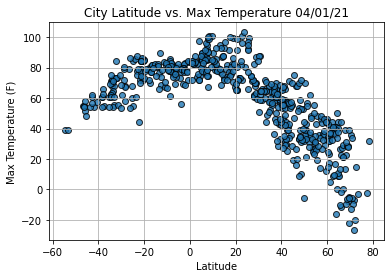

In [116]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

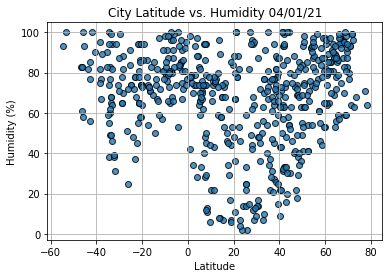

In [117]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

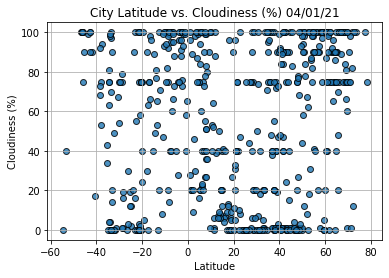

In [118]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

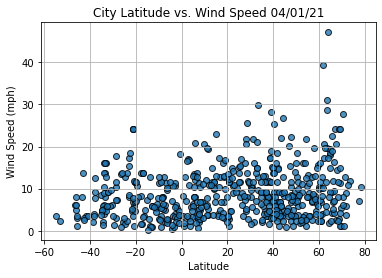

In [119]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [120]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [122]:
index13 = city_data_df.loc[13]
index13

City                     Qaqortoq
Lat                       60.7167
Lng                      -46.0333
Max Temp                     32.0
Humidity                       80
Cloudiness                     75
Wind Speed                    2.3
Country                        GL
Date          2021-04-01 10:55:44
Name: 13, dtype: object

In [123]:
city_data_df["Lat"] >= 0

0       True
1       True
2       True
3       True
4       True
       ...  
551     True
552    False
553     True
554     True
555     True
Name: Lat, Length: 556, dtype: bool

In [125]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Anadyr,64.7500,177.4833,8.60,78,75,17.90,RU,2021-04-01 11:01:29
1,Georgetown,5.4112,100.3354,89.60,66,20,8.05,MY,2021-04-01 10:59:28
2,Tuktoyaktuk,69.4541,-133.0374,-22.07,90,60,11.23,CA,2021-04-01 11:01:29
3,Fortuna,40.5982,-124.1573,46.40,71,1,9.22,US,2021-04-01 11:01:30
4,Catuday,16.2923,119.8062,81.84,75,7,10.36,PH,2021-04-01 10:58:28


In [126]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

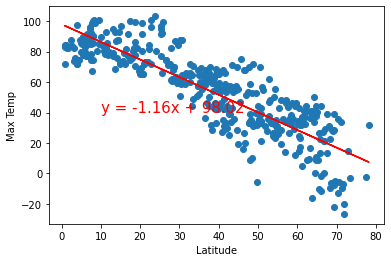

In [127]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))


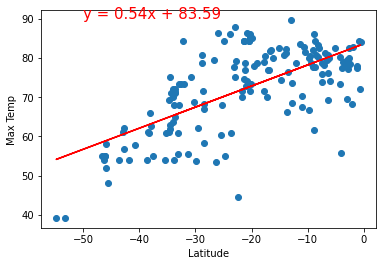

In [128]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

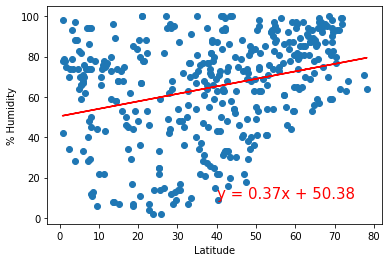

In [129]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

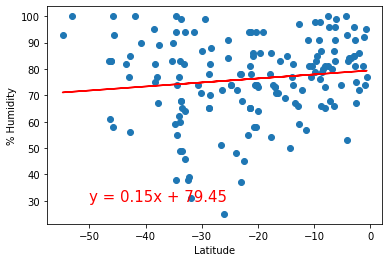

In [135]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                       for % Humidity', '% Humidity',(-50,30))

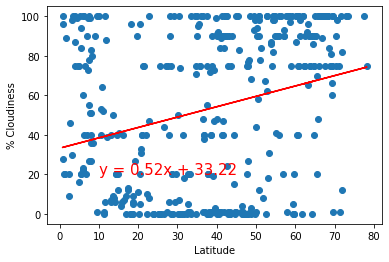

In [142]:
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                       for % Cloudiness', '% Cloudiness',(10,20))

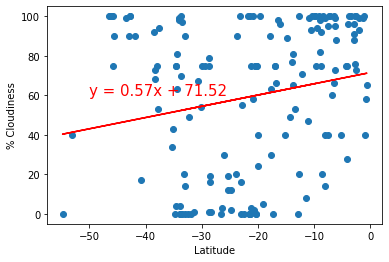

In [144]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

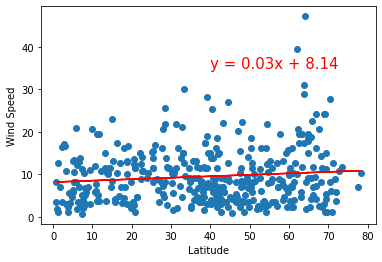

In [146]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

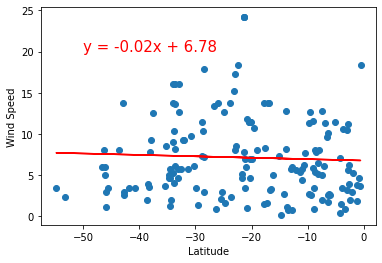

In [149]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,20))